<a href="https://colab.research.google.com/github/LuminousSpace150/Financial-Services-Companies-Project/blob/main/FinancialServicesbyMarketCap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
pip install -U pandasql  # installing pandasql which allows to query pandas DataFrame using SQL syntax.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Import Statements**

In [71]:
from bs4 import BeautifulSoup
from google.colab import drive
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns
import numpy as np
from pandasql import sqldf

Specify `locals()` or `globals()`

In [72]:
pysqldf = lambda q: sqldf(q, globals())

**Web Scraping**

*Step 1: Obtaining the HTML*

In [73]:
URL = 'https://companiesmarketcap.com/financial-services/largest-financial-service-companies-by-market-cap/'
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'

response = requests.get(URL, headers={'user-agent': user_agent})

if response.ok:
  message = 'Request SUCCESSFUL!'
else:
  message = 'Request FAILED'

print('Status Code:', response.status_code)
print(message)


Status Code: 200
Request SUCCESSFUL!


Checking the type of response variable:

In [74]:
type(response)

requests.models.Response

*Step 2: Parsing the HTML*

In [75]:
html = response.content
parser = 'html5lib'

soup = BeautifulSoup(html, parser)
type(soup)

bs4.BeautifulSoup

prettify() method is used to VIEW the Parse tree by Beautiful Soup into a nicely formatted Unicode string.
Here, there is a separate line for each tag and string.

In [76]:
# Printing the first 1500 characters
print(soup.prettify()[:1500])

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <title>
   Largest financial service companies by market cap
  </title>
  <meta charset="utf-8"/>
  <link href="https://companiesmarketcap.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/img/icons/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/img/icons/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/img/icons/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/img/icons/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
  <link href="/img/icons/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
  <link href="/img/icons/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
  <link href="/img/icons/apple-icon-144x144.png" rel="apple-touch-icon" sizes="144x144"/>
  <link href="/img/icons/apple-icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/>
  <link href="/img/icons/apple-icon-180x180.png" rel

*Step 3: Extracting the Data*

Upon inspecting the webpage, we can see the data is encapsulated in the  'tbody' tag, which itself has a set of table rows.

We'll use the `find()` function. This function takes the name of the desired tag as string input and returns the first occurence of that particular tag.

In [77]:
table = soup.find('tbody')

In [78]:
table.prettify()

'<tbody>\n <tr>\n  <td class="rank-td td-right" data-sort="1">\n   1\n  </td>\n  <td class="name-td">\n   <div class="logo-container">\n    <img alt="Visa logo" class="company-logo" data-img-dark-path="/img/company-logos/64/V.D.png" data-img-path="/img/company-logos/64/V.png" loading="lazy" src="/img/company-logos/64/V.png"/>\n   </div>\n   <div class="name-div">\n    <a href="/visa/marketcap/">\n     <div class="company-name">\n      Visa\n     </div>\n     <div class="company-code">\n      <span class="rank d-none">\n      </span>\n      V\n     </div>\n    </a>\n   </div>\n  </td>\n  <td class="td-right" data-sort="477526654976">\n   $477.52 B\n  </td>\n  <td class="td-right" data-sort="22720">\n   $227.20\n  </td>\n  <td class="rh-sm" data-sort="-94">\n   <span class="percentage-red">\n    <svg class="a" viewBox="0 0 12 12">\n     <path d="m2 4h8l-4 4z">\n     </path>\n    </svg>\n    0.94%\n   </span>\n  </td>\n  <td class="p-0 sparkline-td green">\n   <svg>\n    <path d="M0,40 5,

*Scraping One Row*

We can extract one row (company details) by applying same method like before to the `table` variable.
Each row is in an HTML element with the `tr` tag.




In [79]:
first_row = table.find('tr')


In [80]:
print(first_row.prettify())

<tr>
 <td class="rank-td td-right" data-sort="1">
  1
 </td>
 <td class="name-td">
  <div class="logo-container">
   <img alt="Visa logo" class="company-logo" data-img-dark-path="/img/company-logos/64/V.D.png" data-img-path="/img/company-logos/64/V.png" loading="lazy" src="/img/company-logos/64/V.png"/>
  </div>
  <div class="name-div">
   <a href="/visa/marketcap/">
    <div class="company-name">
     Visa
    </div>
    <div class="company-code">
     <span class="rank d-none">
     </span>
     V
    </div>
   </a>
  </div>
 </td>
 <td class="td-right" data-sort="477526654976">
  $477.52 B
 </td>
 <td class="td-right" data-sort="22720">
  $227.20
 </td>
 <td class="rh-sm" data-sort="-94">
  <span class="percentage-red">
   <svg class="a" viewBox="0 0 12 12">
    <path d="m2 4h8l-4 4z">
    </path>
   </svg>
   0.94%
  </span>
 </td>
 <td class="p-0 sparkline-td green">
  <svg>
   <path d="M0,40 5,40 10,41 15,33 20,35 25,25 30,23 35,19 40,18 45,15 50,16 55,16 60,16 65,22 70,20 75,14 

*Using the first_row variable, we can extract specific information like Company name, market cap, price, etc.*

In [81]:
first_row.find('div', {'class': 'company-name'})

<div class="company-name">Visa</div>

*Using the `text` attribute to retrieve the content of the HTML element.*

In [82]:
company = first_row.find('div', {'class': 'company-name'}).text
company

'Visa'

Ticker

In [83]:
ticker = first_row.find('div', {'class': 'company-code'}).text
ticker

'V'

Market Cap.

In [84]:
market_cap = first_row.find_all('td', {'class': 'td-right'})[1].text
market_cap

'$477.52 B'

Price

In [85]:
price = first_row.find_all('td', {'class': 'td-right'})[2].text
price

'$227.20'

Daily Change Value

In [86]:
daily_change = first_row.find_all('span')[1].text
daily_change

'0.94%'

Daily Change Color

In [87]:
daily_change_color = first_row.find_all('span')[1].get('class')
daily_change_color


['percentage-red']

Country

In [88]:
country = first_row.find_all('span', {'class': 'responsive-hidden'})[0].text
country

'USA'

*Summarizing the data by creating a Pandas Data Frame.*

In [89]:
first_row = pd.DataFrame(
    {
        'Company' : company,
        'Ticker' : ticker,
        'Market Cap.' : market_cap,
        'Price' : price,
        'Daily Change' : daily_change,
        'Daily Difference': daily_change_color,
        'Country' : country
    },
    index=[0])
first_row

,Company,Ticker,Market Cap.,Price,Daily Change,Daily Difference,Country
0,Visa,V,$477.52 B,$227.20,0.94%,percentage-red,USA


***Scrapping One Page***

`find_all()` will be used to extract all occurences of `tr` tag from the web page, as all the data for each specific company is encapsulated in this tag.

In [90]:
table = table.find_all('tr')

In [91]:
#Verifying the length  of the table variable confirms that all rows(companies) were successfully extracted.
len(table)

100

*Using LOOP to iterate over all rows of the page.*

In [92]:
companies, tickers, market_caps, stock_prices, price_changes, price_change_color, countries = [], [], [], [], [], [], []

for i in range(len(table)):
  companies.append(table[i].find('div', {'class': 'company-name'}).text)
  tickers.append(table[i].find('div', {'class': 'company-code'}).text)
  market_caps.append(table[i].find_all('td', {'class': 'td-right'})[1].text)
  stock_prices.append(table[i].find_all('td', {'class': 'td-right'})[2].text)
  price_changes.append(table[i].find_all('span')[1].text)
  price_change_color.append(table[i].find_all('span')[1].get('class'))
  countries.append(table[i].find_all('span', {'class': 'responsive-hidden'})[0].text)


*Creating a Data Frame for the first page.*
*Printing the first and last 3 rows to verify if everything is correct.*

In [93]:
first_page_df = pd.DataFrame({
    'Company': companies,
    'Ticker': tickers,
    'Market Cap': market_caps,
    'Stock Price': stock_prices,
    'Price Change': price_changes,
    'Price Status': price_change_color,
    'Country': countries
})

first_page_df.iloc[[0,1,2,97,98,99]]

,Company,Ticker,Market Cap,Stock Price,Price Change,Price Status,Country
0,Visa,V,$477.52 B,$227.20,0.94%,[percentage-red],USA
1,JPMorgan Chase,JPM,$413.85 B,$141.04,0.44%,[percentage-green],USA
2,Mastercard,MA,$350.68 B,$366.83,0.97%,[percentage-red],USA
97,Sun Life Financial\n,SLF,$29.76 B,$50.71,0.00%,[percentage-green],Canada
98,Nasdaq,NDAQ,$29.29 B,$59.62,1.09%,[percentage-green],USA
99,Bajaj Finserv,BAJAJFINSV.NS,$27.48 B,$17.25,0.11%,[percentage-green],India


***Check for null values***

In [94]:
first_page_df.isnull().any()

Company         False
Ticker          False
Market Cap      False
Stock Price     False
Price Change    False
Price Status    False
Country         False
dtype: bool

***Checking for Null values using other method***

In [95]:
first_page_df.isna()

,Company,Ticker,Market Cap,Stock Price,Price Change,Price Status,Country
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False


**Exporting data to a CSV file:**

In [96]:
first_page_df.to_csv('Financial Services Companies.csv', index=False)

**Exploratory Data Analysis & Cleaning the Scraped Dataset**

In [97]:
df = pd.read_csv('Financial Services Companies.csv')
df.head()

,Company,Ticker,Market Cap,Stock Price,Price Change,Price Status,Country
0,Visa,V,$477.52 B,$227.20,0.94%,['percentage-red'],USA
1,JPMorgan Chase,JPM,$413.85 B,$141.04,0.44%,['percentage-green'],USA
2,Mastercard,MA,$350.68 B,$366.83,0.97%,['percentage-red'],USA
3,Bank of America,BAC,$284.52 B,$35.58,0.39%,['percentage-red'],USA
4,ICBC,1398.HK,$217.14 B,$0.52,0.25%,['percentage-red'],China


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company       100 non-null    object
 1   Ticker        100 non-null    object
 2   Market Cap    100 non-null    object
 3   Stock Price   100 non-null    object
 4   Price Change  100 non-null    object
 5   Price Status  100 non-null    object
 6   Country       100 non-null    object
dtypes: object(7)
memory usage: 5.6+ KB


There are no missing values in the dataset.

*Although, we need to convert the data types of Market Cap, Stock Price and Price Status to numerical instead of object.*

*Removing '$' symbol from market cap.*

In [99]:
df['Market Cap'] = df['Market Cap'].str.strip('$')

*Multiplying the numerical value by a number based on millions, billions or trillions.*

In [100]:
def function(x):
  if x[1] == 'B':
    mul = 1E+9
  elif x[1] == 'M':
    mul = 1E+6
  
  return float(x[0]) * mul

df['Market Cap'] = df['Market Cap'].str.split().apply(function).astype(float)

*Checking revised data type.*

In [101]:
df['Market Cap'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 0 to 99
Series name: Market Cap
Non-Null Count  Dtype  
--------------  -----  
100 non-null    float64
dtypes: float64(1)
memory usage: 928.0 bytes


*For 'Stock Price' we need to remove the '$' symbol and the commas.*

In [102]:
df['Stock Price'] = df['Stock Price'].str.strip('$')
df['Stock Price'] = df['Stock Price'].str.replace(',', '')

*Strip the percantage symbol from all rows in 'Price Change' and renaming the column to 'Today's Price Change'*

In [103]:
df['Price Change'] = df['Price Change'].str.strip('%').astype(float)
df.rename(columns={"Price Change": "Today's Price Change (%)"}, inplace=True)

*Removing '\n' from Company column.*

In [104]:
df['Company'] = df['Company'].str.strip('\n')

***Changing the Price Status values to Up for 'percentage-green' and Down for 'percentage-red'.***

In [105]:
df['Price Status'] = df['Price Status'].replace(to_replace="['percentage-green']", value="Up")
df['Price Status'] = df['Price Status'].replace(to_replace="['percentage-red']", value="Down")

*Changing S.Arabi to Saudi Arabia in the 'Country' column.*

In [106]:
df['Country'].replace({'S. Arabia': 'Saudi Arabia'}, inplace=True)

***Checking the updated values.***

In [107]:
df.head()

,Company,Ticker,Market Cap,Stock Price,Today's Price Change (%),Price Status,Country
0,Visa,V,4.775200e+11,227.20,0.94,Down,USA
1,JPMorgan Chase,JPM,4.138500e+11,141.04,0.44,Up,USA
2,Mastercard,MA,3.506800e+11,366.83,0.97,Down,USA
3,Bank of America,BAC,2.845200e+11,35.58,0.39,Down,USA
4,ICBC,1398.HK,2.171400e+11,0.52,0.25,Down,China


***Query to check if country name 'Saudi Arabia' is properly updated.***

In [108]:
query1 = "SELECT * FROM df WHERE Country= 'Saudi Arabia'"
pysqldf(query1)

,Company,Ticker,Market Cap,Stock Price,Today's Price Change (%),Price Status,Country
0,Al Rajhi Bank,1120.SR,8.237000e+10,20.59,1.78,Down,Saudi Arabia
1,The Saudi National Bank,1180.SR,5.722000e+10,12.89,0.72,Down,Saudi Arabia


**Creating a data frame for big 5 banks of Canada.**

In [109]:
df_big_five_canadian_banks = df[(df['Ticker'].isin(['BNS','CM','TD', 'RY', 'BMO']))]

In [110]:
df_big_five_canadian_banks.head()

,Company,Ticker,Market Cap,Stock Price,Today's Price Change (%),Price Status,Country
11,Royal Bank Of Canada,RY,1.437200e+11,103.93,0.54,Up,Canada
15,Toronto Dominion Bank,TD,1.268800e+11,69.69,1.26,Up,Canada
28,Bank of Montreal,BMO,7.143000e+10,101.43,0.52,Up,Canada
34,Scotiabank,BNS,6.573000e+10,55.12,1.47,Up,Canada
68,CIBC,CM,4.193000e+10,46.21,1.09,Up,Canada


**Data frame for financial services and banks from Canada.**

In [111]:
df_canadian_companies = df[df['Country'] == 'Canada']

In [112]:
df_canadian_companies.head()

,Company,Ticker,Market Cap,Stock Price,Today's Price Change (%),Price Status,Country
11,Royal Bank Of Canada,RY,1.437200e+11,103.93,0.54,Up,Canada
15,Toronto Dominion Bank,TD,1.268800e+11,69.69,1.26,Up,Canada
28,Bank of Montreal,BMO,7.143000e+10,101.43,0.52,Up,Canada
34,Scotiabank,BNS,6.573000e+10,55.12,1.47,Up,Canada
68,CIBC,CM,4.193000e+10,46.21,1.09,Up,Canada


***SQL Query to show all Canadian financial services companies from the top 100 market cap list of Financial Services.***

In [113]:
query = "SELECT * FROM df_canadian_companies WHERE Country= 'Canada'"
pysqldf(query)

,Company,Ticker,Market Cap,Stock Price,Today's Price Change (%),Price Status,Country
0,Royal Bank Of Canada,RY,1.437200e+11,103.93,0.54,Up,Canada
1,Toronto Dominion Bank,TD,1.268800e+11,69.69,1.26,Up,Canada
2,Bank of Montreal,BMO,7.143000e+10,101.43,0.52,Up,Canada
3,Scotiabank,BNS,6.573000e+10,55.12,1.47,Up,Canada
4,CIBC,CM,4.193000e+10,46.21,1.09,Up,Canada
5,Manulife Financial,MFC,3.646000e+10,19.55,0.62,Up,Canada
6,Sun Life Financial,SLF,2.976000e+10,50.71,0.00,Up,Canada


**Creating a CSV file now.**

In [114]:
no_of_countries = df.Country.nunique()
print(f'There are {no_of_countries} countries in the dataset')

There are 22 countries in the dataset


**Data Visualisation**

***Setting up default parameters.***

In [115]:
%config InlineBackend.figure_format = 'retina'

facecolor = '#3d3d5c'
plt.rcParams['figure.facecolor'] = facecolor
plt.rcParams['axes.facecolor'] = facecolor
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

font_size = 18
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.family'] = 'Georgia'

**Countries having financial services company in the top 100 market cap list.**

---



In [116]:
df_countries = pd.DataFrame({'Country': df['Country'].unique()})

fig = px.choropleth(df_countries,
                    locations='Country',
                    color_discrete_sequence=np.full(no_of_countries, '#ffbf00'),
                    locationmode='country names',
                    fitbounds='locations')

fig.update_layout(width=800,
                  plot_bgcolor=facecolor,
                  paper_bgcolor=facecolor,
                  geo=dict(bgcolor=facecolor,
                           landcolor='#663300',
                           showlakes=False,
                           showocean=True,
                           oceancolor=facecolor),
                  title={
                      'text':
                      'Countries having headquarters of Financial Services Companies.',
                      'x': 0.5,
                      'xanchor': 'center',
                      'y': 0.95,
                      'font': {'color': 'white', 'size': 22, 'family': 'Helvetica'}
                  },
                  margin={'r': 0, 't': 0, 'l': 0, 'b': 0})

fig.update_traces(showlegend=False)
fig.update_geos(resolution=50, visible=True)



**Top 10 Countries with highest market cap.**

In [117]:
df_total_market_cap = df.groupby('Country')['Market Cap'].sum().to_frame()
df_total_market_cap.sort_values(by='Market Cap', ascending=False, inplace=True)

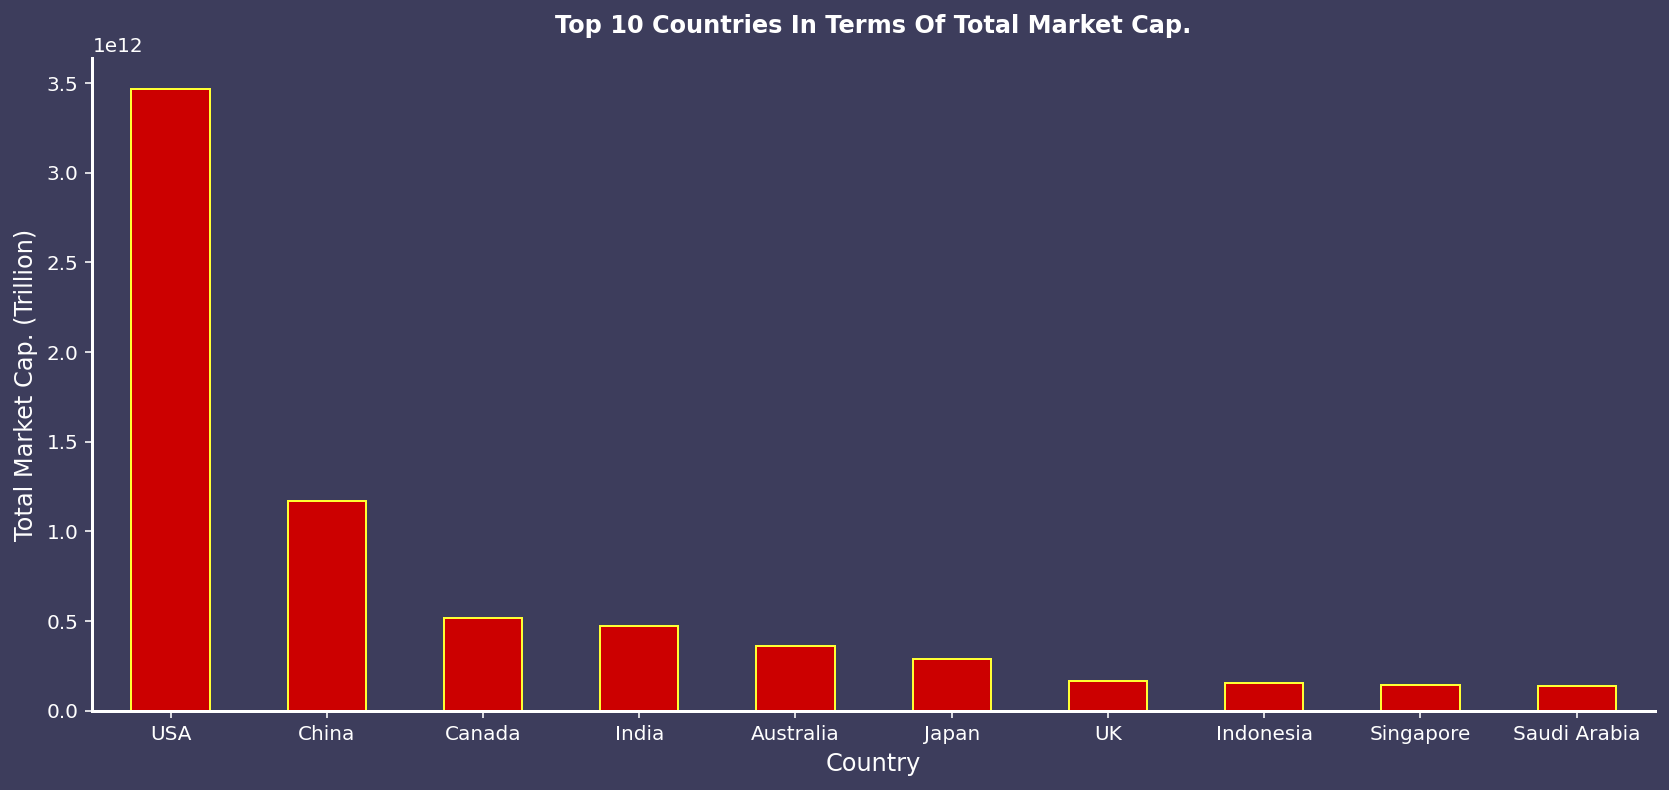

In [118]:
fig, ax = plt.subplots(figsize=(14, 6), facecolor=facecolor)

df_total_market_cap.head(10).plot(kind='bar',
                          color='#cc0000',
                          edgecolor='#ffff33',
                          ax=ax)

ax.set_title('Top 10 Countries In Terms Of Total Market Cap.', y=1.02)
ax.set(xlabel='Country', ylabel='Total Market Cap. (Trillion)')

#scale_y = 1e12
#ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / scale_y))
#ax.yaxis.set_major_formatter(ticks_y)

ax.tick_params(axis='x', labelrotation=0)
ax.get_legend().remove();

**Top 10 Countries with most financial services companies.**

In [119]:
df_no_of_companies = df.groupby('Country')['Company'].count().reset_index(name="company_count")

In [120]:
df_no_of_companies.set_index('Country', inplace=True)


In [121]:
print(df_no_of_companies)

              company_count
Country                    
Australia                 5
Brazil                    2
Canada                    7
China                    13
Finland                   1
France                    2
Germany                   1
Hong Kong                 3
India                     8
Indonesia                 3
Ireland                   1
Italy                     2
Japan                     5
Netherlands               2
Norway                    1
Saudi Arabia              2
Singapore                 3
Spain                     3
Switzerland               1
UAE                       1
UK                        4
USA                      30


**Sorting the countries with most company count in descending order.**

In [122]:
df_no_of_companies.sort_values(by='company_count', ascending=False, inplace=True)

In [123]:
print("Top 10 countries with most companies.")
df_no_of_companies.head(10)

Top 10 countries with most companies.


,company_count
Country,
USA,30
China,13
India,8
Canada,7
Japan,5
Australia,5
UK,4
Hong Kong,3
Indonesia,3


*Assigning the first 10 countries to a new data frame.*

In [124]:
df_top_10_countries = df_no_of_companies.head(10)

In [125]:
print(df_top_10_countries)

           company_count
Country                 
USA                   30
China                 13
India                  8
Canada                 7
Japan                  5
Australia              5
UK                     4
Hong Kong              3
Indonesia              3
Singapore              3


In [126]:
fig = px.pie(labels=df_top_10_countries.index, 
             values=df_top_10_countries.company_count.values,
             title= "Top 10 Countries with most financial services companies",
             names=df_top_10_countries.index
             )
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()





/usr/local/lib/python3.8/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



Big 5 banks of Canada

In [127]:
h_bar = px.bar(x = df_big_five_canadian_banks['Market Cap'].values,
               y = df_big_five_canadian_banks.Company.values,
               orientation='h',
               title='Big 5 Canadian Banks by Market Cap')
# As values of Y-axis are ascending from bottom to top. 
h_bar.update_layout(xaxis_title='Market Cap', yaxis_title='Bank', yaxis={'categoryorder' : 'total ascending'})
h_bar.show()


Saving dataframe to a CSV file

In [135]:
df.to_csv('Largest Financial Services Companies.csv', index=False)